In [11]:
import pandas as pd

In [12]:
data = pd.read_csv('filtered_data.csv')

/tmp/ipykernel_34568/751481967.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('filtered_data.csv')


Which crime categories are most prevalent in San Diego?

In [13]:
import pandas as pd

# Load the cleaned dataset
file_path = 'filtered_data.csv'  # Update with the actual file path
chunk_size = 100000  # Adjust for memory efficiency if the file is large

# Initialize an empty DataFrame to store the aggregated data
crime_counts = {}

# Process the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Count occurrences of each crime in the current chunk
    chunk_counts = chunk['ibr_category'].value_counts()
    # Aggregate counts across chunks
    for crime, count in chunk_counts.items():
        if crime in crime_counts:
            crime_counts[crime] += count
        else:
            crime_counts[crime] = count

# Convert the dictionary to a DataFrame for better presentation
crime_counts_df = pd.DataFrame(list(crime_counts.items()), columns=['Crime Category', 'Frequency'])
crime_counts_df = crime_counts_df.sort_values(by='Frequency', ascending=False)

# Display the top 10 most common crime categories
print(crime_counts_df.head(10))


/tmp/ipykernel_34568/788461050.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/tmp/ipykernel_34568/788461050.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):


                             Crime Category  Frequency
0                        GROUP "B" OFFENSES      96869
1                    LARCENY/THEFT OFFENSES      72096
2                          ASSAULT OFFENSES      52764
3  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY      32519
4                    DRUG/NARCOTIC OFFENSES      30053
5                       MOTOR VEHICLE THEFT      26558
6                            FRAUD OFFENSES      15496
7              BURGLARY/BREAKING & ENTERING      14357
8                                   ROBBERY       5127
9                     WEAPON LAW VIOLATIONS       4672


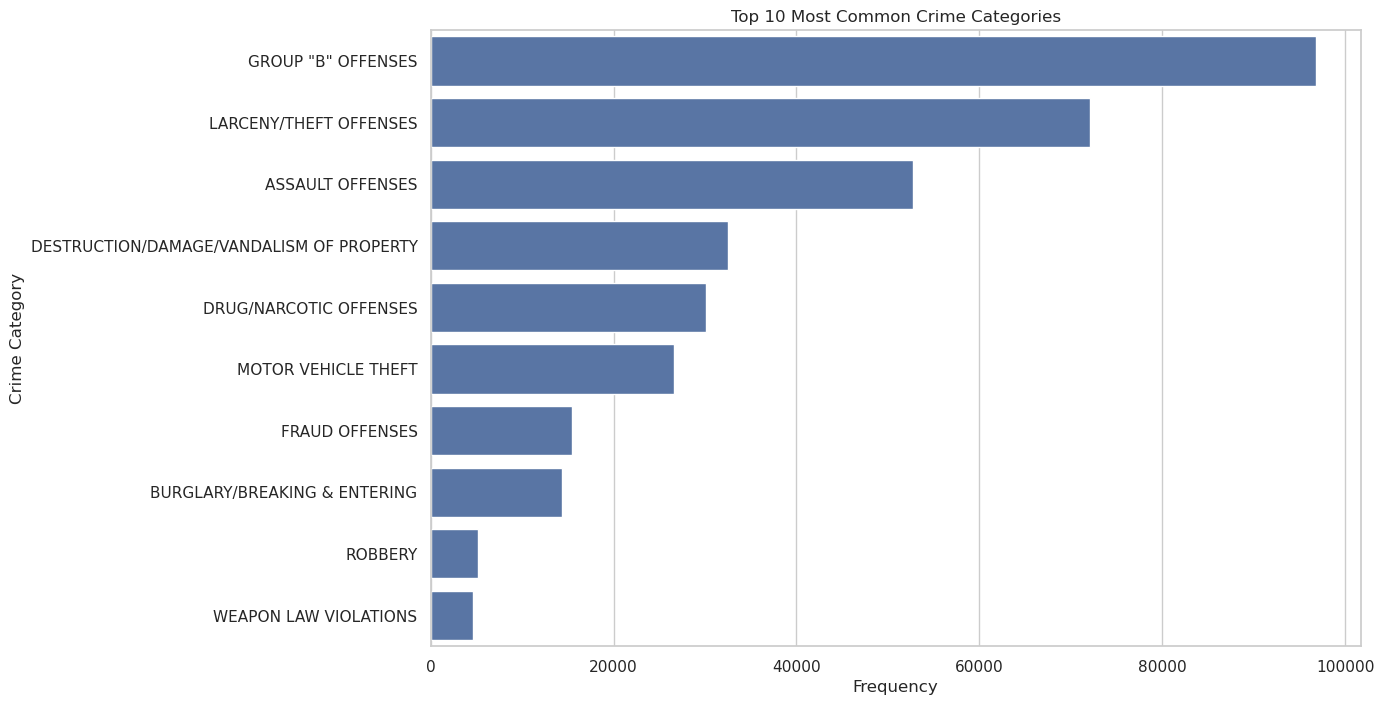

/tmp/ipykernel_34568/1001849417.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('occured_on').resample('M').size().plot()


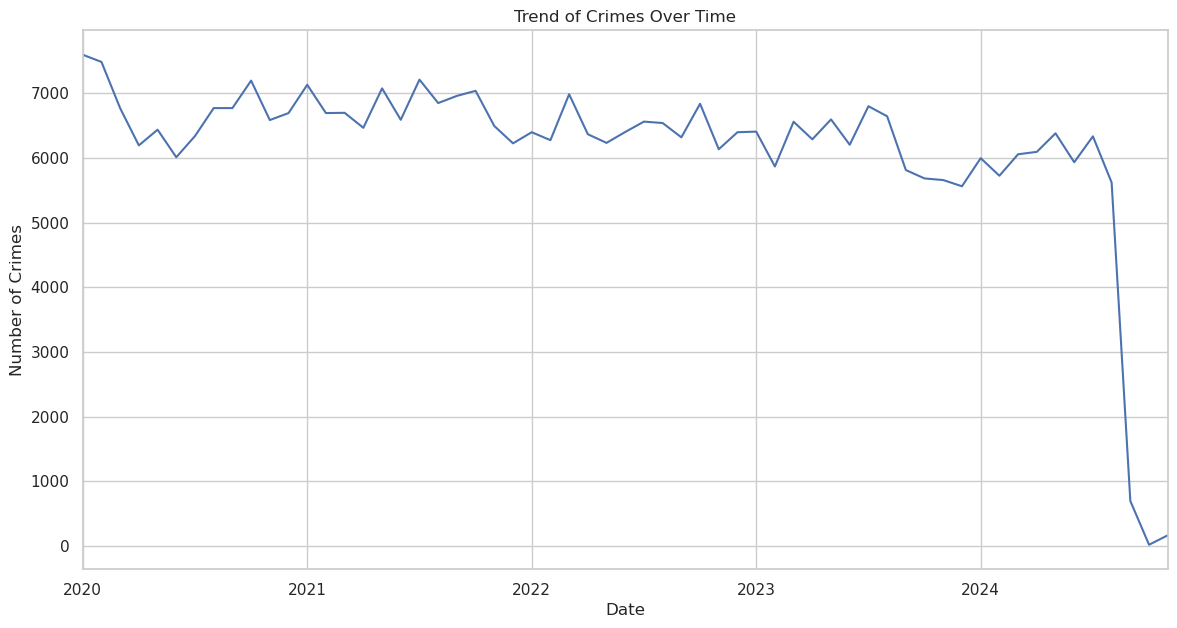

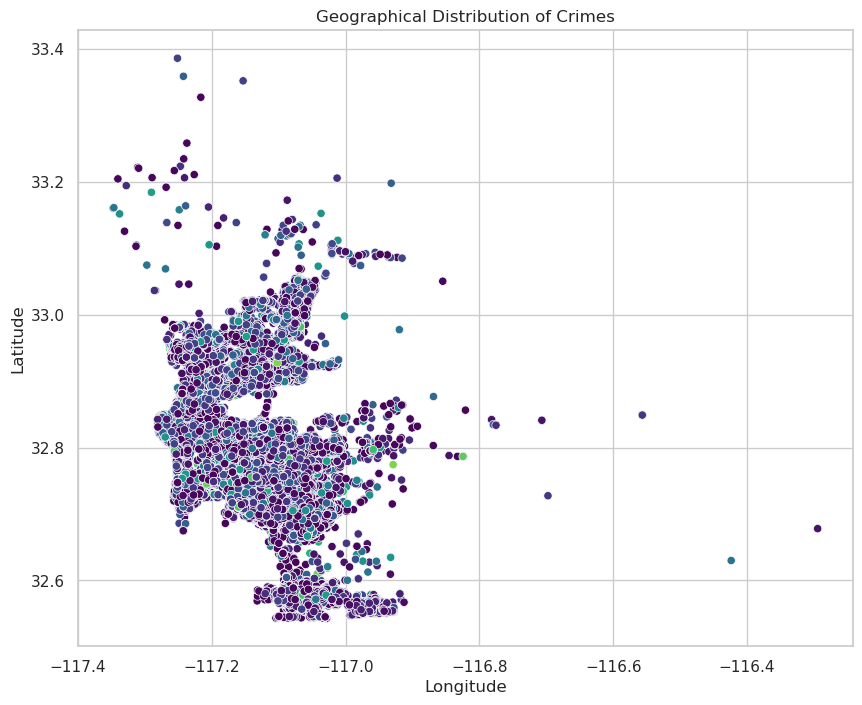

In [14]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of crime categories
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Crime Category', data=crime_counts_df.head(10))
plt.title('Top 10 Most Common Crime Categories')
plt.xlabel('Frequency')
plt.ylabel('Crime Category')
plt.show()

# Convert 'occured_on' to datetime
data['occured_on'] = pd.to_datetime(data['occured_on'])

# Plot the trend of crimes over time
plt.figure(figsize=(14, 7))
data.set_index('occured_on').resample('M').size().plot()
plt.title('Trend of Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

# Plot the geographical distribution of crimes
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='ibr_offense_description', data=data, legend=False, palette='viridis')
plt.title('Geographical Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Scatter plot area wise for most common crime categories

/tmp/ipykernel_34568/3482913332.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


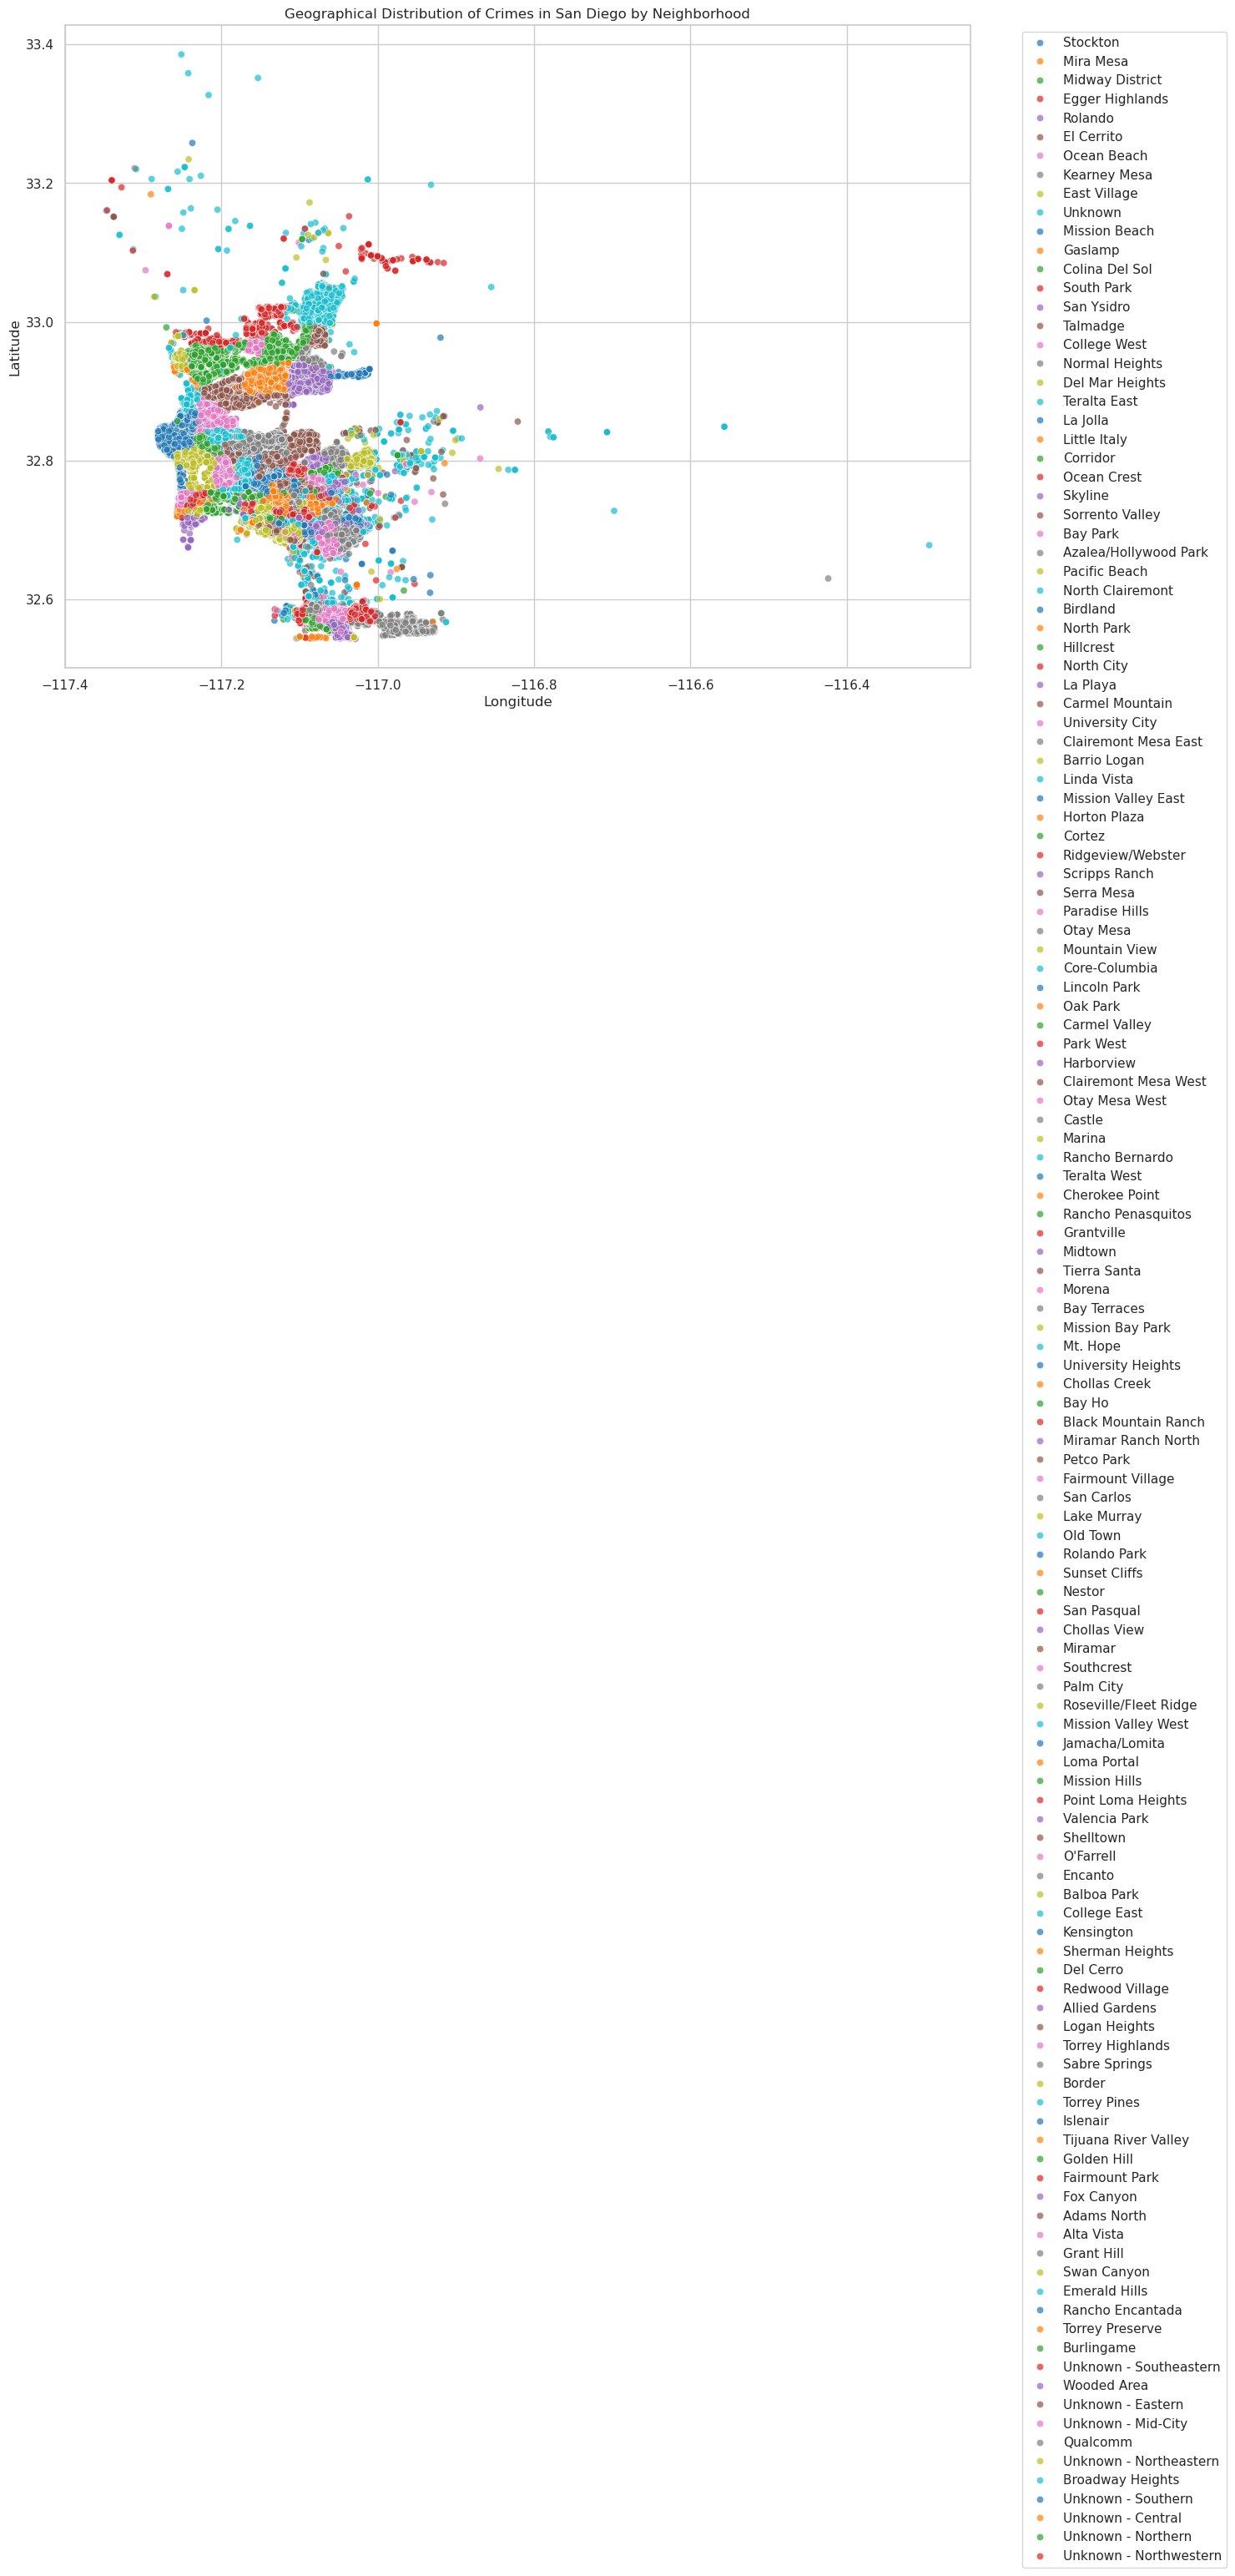

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = 'filtered_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Filter necessary columns
data = data[['latitude', 'longitude', 'neighborhood', 'ibr_offense_description']]

# Drop rows with missing coordinates or neighborhood data
data = data.dropna(subset=['latitude', 'longitude', 'neighborhood'])

# Plot the geographical distribution of crimes categorized by neighborhood
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='neighborhood',
    data=data,
    palette='tab10',
    alpha=0.7,
    legend='full'
)
plt.title('Geographical Distribution of Crimes in San Diego by Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


What types of crime have seen an increase or decrease over time?

/tmp/ipykernel_34568/2696681745.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size):
/tmp/ipykernel_34568/2696681745.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size):


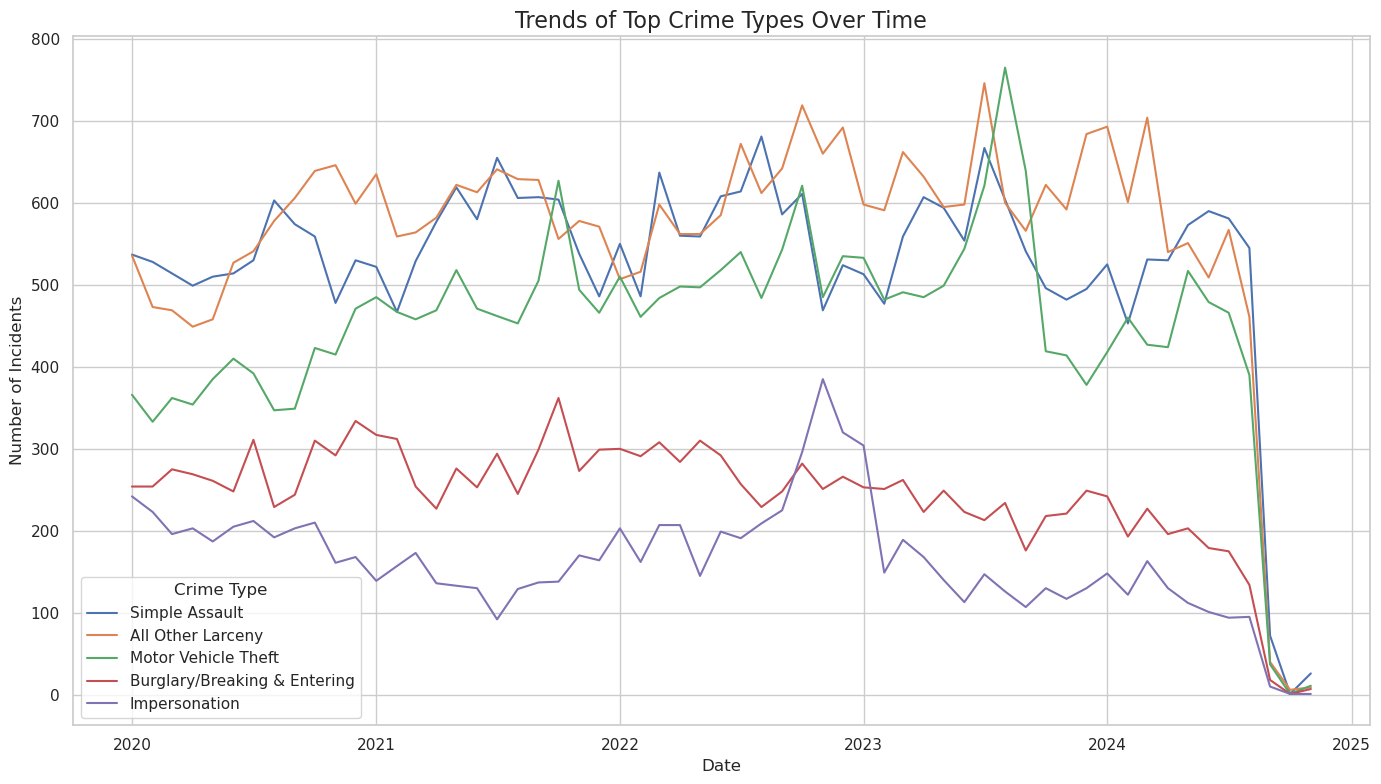

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'filtered_data.csv'  # Replace with your file path
chunk_size = 100000  # For memory-efficient processing

# Initialize an empty DataFrame to store aggregated results
crime_trend_data = pd.DataFrame()

# Process the file in chunks
for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size):
    # Ensure 'occured_on' is in datetime format and extract year and month
    chunk['year_month'] = chunk['occured_on'].dt.to_period('M')
    
    # Group by 'year_month' and 'ibr_offense_description', then count occurrences
    monthly_counts = chunk.groupby(['year_month', 'ibr_offense_description']).size().reset_index(name='count')
    
    # Append to the main trend data
    crime_trend_data = pd.concat([crime_trend_data, monthly_counts], ignore_index=True)

# Aggregate by summing up counts across all chunks
crime_trend_data = crime_trend_data.groupby(['year_month', 'ibr_offense_description']).sum().reset_index()

# Convert 'year_month' to datetime for proper plotting
crime_trend_data['year_month'] = crime_trend_data['year_month'].astype(str)
crime_trend_data['year_month'] = pd.to_datetime(crime_trend_data['year_month'])

# Pivot table to reshape data for visualization
crime_pivot = crime_trend_data.pivot(index='year_month', columns='ibr_offense_description', values='count')

# Plot trends for the top 5 most common crime types
top_crimes = crime_trend_data['ibr_offense_description'].value_counts().head(5).index
plt.figure(figsize=(14, 8))
for crime in top_crimes:
    if crime in crime_pivot.columns:
        plt.plot(crime_pivot.index, crime_pivot[crime], label=crime)

# Add chart details
plt.title('Trends of Top Crime Types Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Crime Type')
plt.grid(True)
plt.tight_layout()
plt.show()


How do crimes differ in frequency by type of crime committed against specific groups (e.g., persons, property, society)

/tmp/ipykernel_34568/665846430.py:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/tmp/ipykernel_34568/665846430.py:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/tmp/ipykernel_34568/665846430.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_crime_by_group, x='crime_against', y='count', palette='viridis')


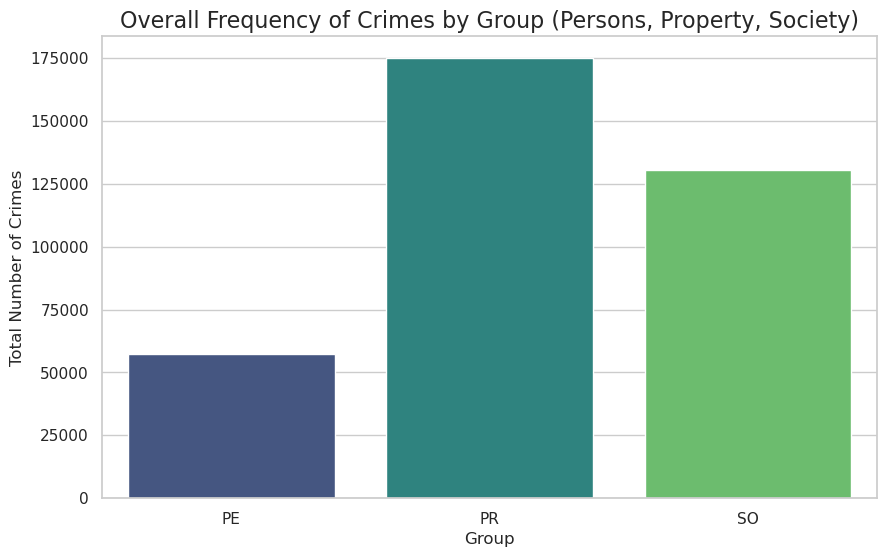

/tmp/ipykernel_34568/665846430.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_data, x='count', y='ibr_offense_description', palette='coolwarm')


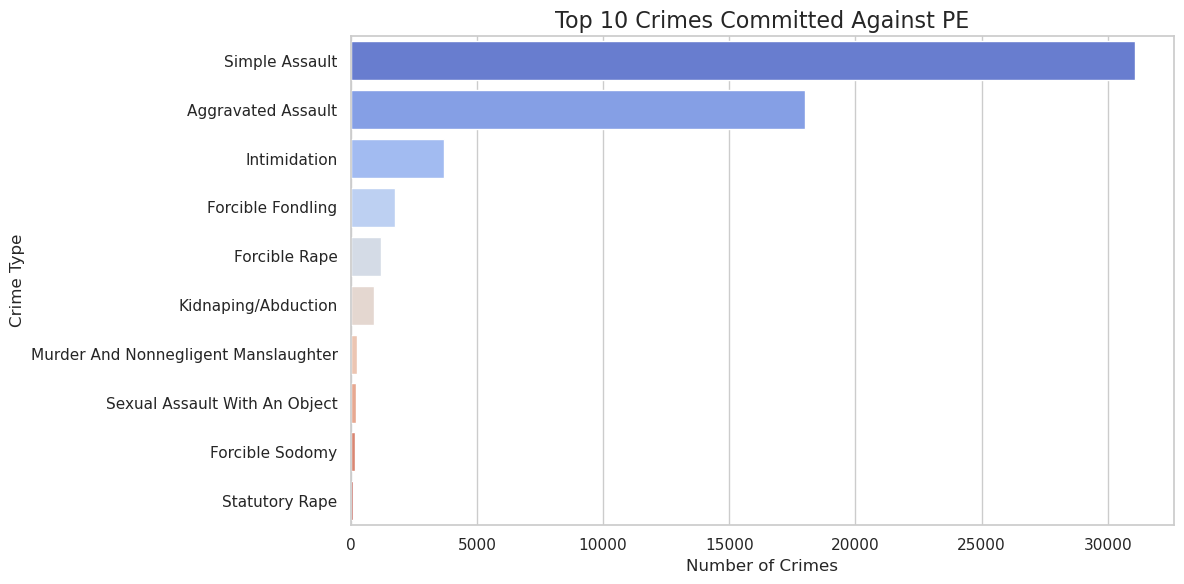

/tmp/ipykernel_34568/665846430.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_data, x='count', y='ibr_offense_description', palette='coolwarm')


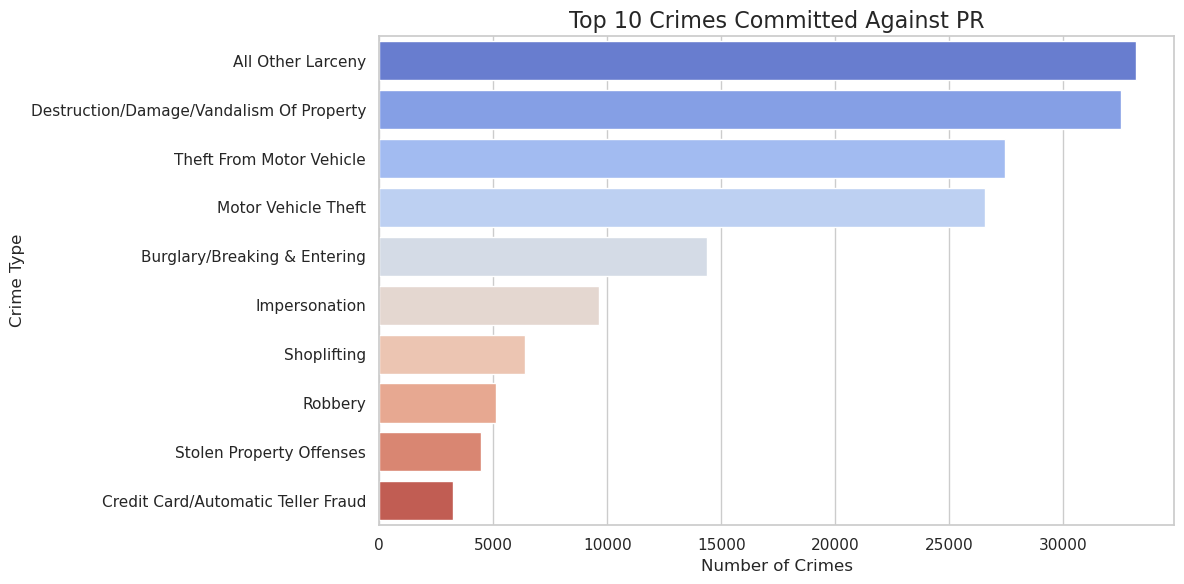

/tmp/ipykernel_34568/665846430.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_data, x='count', y='ibr_offense_description', palette='coolwarm')


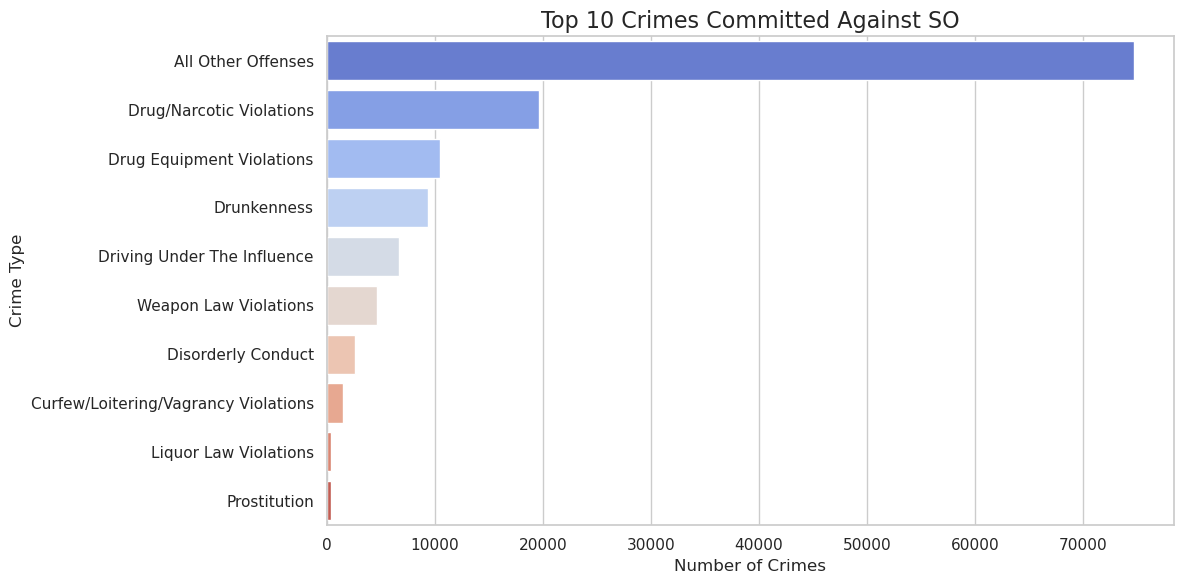

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'filtered_data.csv'  # Replace with your file path
chunk_size = 100000  # For large datasets

# Initialize an empty DataFrame to store the aggregated data
crime_by_group = pd.DataFrame()

# Process the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Group by 'crime_against' and 'ibr_offense_description' to count occurrences
    group_counts = chunk.groupby(['crime_against', 'ibr_offense_description']).size().reset_index(name='count')
    
    # Append the results to the main DataFrame
    crime_by_group = pd.concat([crime_by_group, group_counts], ignore_index=True)

# Aggregate the counts across all chunks
crime_by_group = crime_by_group.groupby(['crime_against', 'ibr_offense_description']).sum().reset_index()

# Total counts for each crime group
total_crime_by_group = crime_by_group.groupby('crime_against')['count'].sum().reset_index()

# Plot the overall distribution of crimes by group
plt.figure(figsize=(10, 6))
sns.barplot(data=total_crime_by_group, x='crime_against', y='count', palette='viridis')
plt.title('Overall Frequency of Crimes by Group (Persons, Property, Society)', fontsize=16)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Total Number of Crimes', fontsize=12)
plt.show()

# Detailed analysis: Plot top crimes for each group
groups = crime_by_group['crime_against'].unique()
for group in groups:
    group_data = crime_by_group[crime_by_group['crime_against'] == group].sort_values(by='count', ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=group_data, x='count', y='ibr_offense_description', palette='coolwarm')
    plt.title(f'Top 10 Crimes Committed Against {group}', fontsize=16)
    plt.xlabel('Number of Crimes', fontsize=12)
    plt.ylabel('Crime Type', fontsize=12)
    plt.tight_layout()
    plt.show()




Heatmap for Neighborhood vs. Crime Types:

/tmp/ipykernel_34568/1366516539.py:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/tmp/ipykernel_34568/1366516539.py:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):


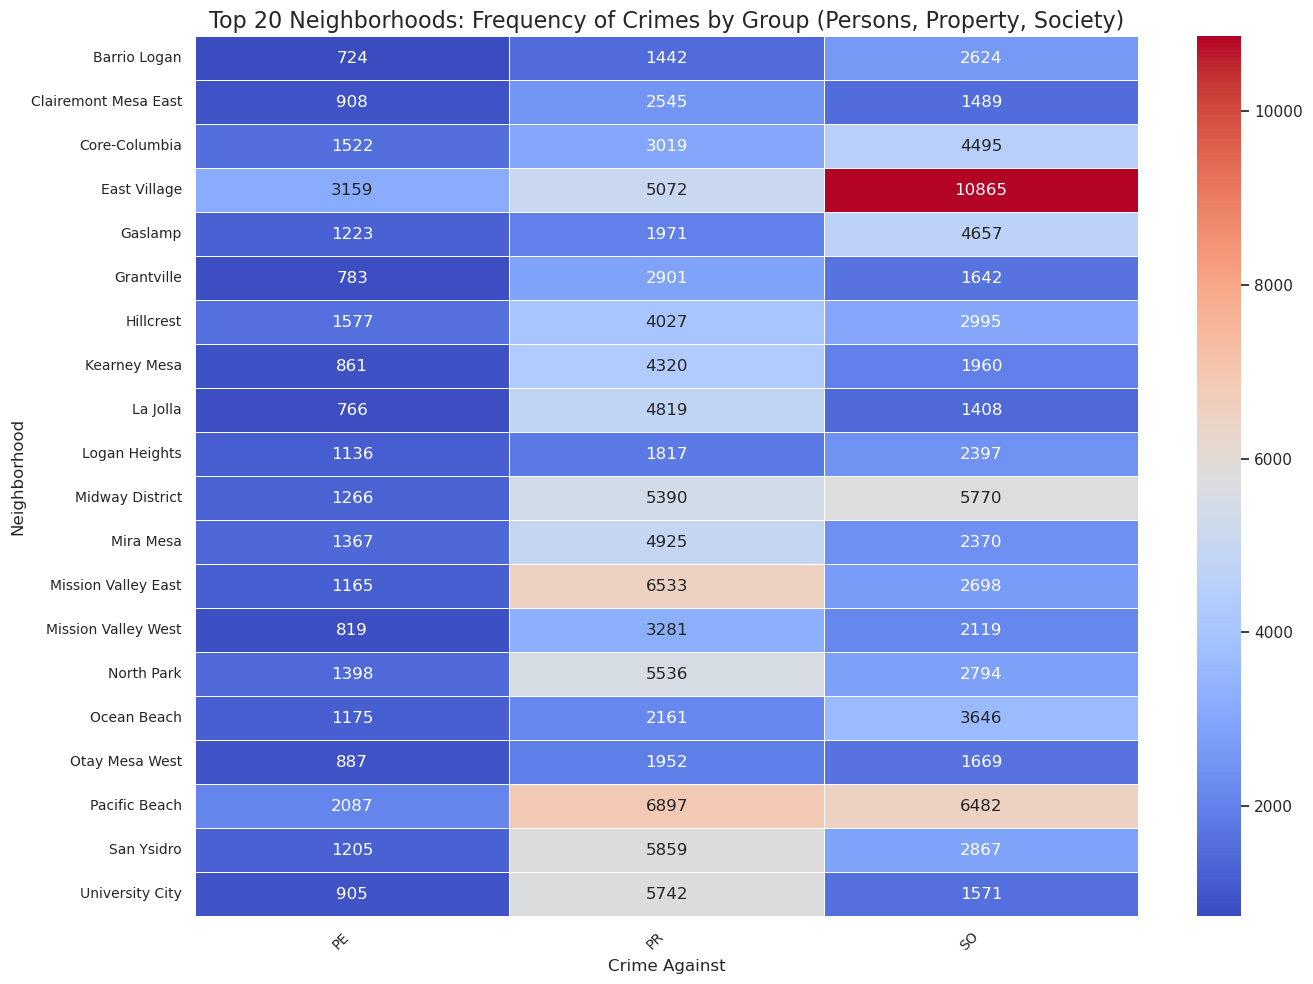

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'filtered_data.csv'  # Replace with your file path
chunk_size = 100000  # For large datasets

# Initialize an empty DataFrame to aggregate the data
neighborhood_crime_data = pd.DataFrame()

# Process the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Group by 'neighborhood' and 'crime_against' and count occurrences
    chunk_grouped = chunk.groupby(['neighborhood', 'crime_against']).size().reset_index(name='count')
    neighborhood_crime_data = pd.concat([neighborhood_crime_data, chunk_grouped], ignore_index=True)

# Aggregate the data across all chunks
neighborhood_crime_data = neighborhood_crime_data.groupby(['neighborhood', 'crime_against']).sum().reset_index()

# Add total counts for each neighborhood to sort by crime volume
neighborhood_crime_data['total_count'] = neighborhood_crime_data.groupby('neighborhood')['count'].transform('sum')

# Sort neighborhoods by total crime count
neighborhood_crime_data = neighborhood_crime_data.sort_values(by='total_count', ascending=False)

# Select the top 20 neighborhoods with the highest crime counts
top_neighborhoods = neighborhood_crime_data['neighborhood'].unique()[:20]
neighborhood_crime_data = neighborhood_crime_data[neighborhood_crime_data['neighborhood'].isin(top_neighborhoods)]

# Pivot the data to create a matrix for the heatmap
heatmap_data = neighborhood_crime_data.pivot(index='neighborhood', columns='crime_against', values='count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',
    annot=True,       # Display the counts on the heatmap
    fmt='.0f',        # Format for the annotation
    linewidths=0.5,   # Add gridlines
    cbar=True         # Show color bar
)

# Add titles and labels
plt.title('Top 20 Neighborhoods: Frequency of Crimes by Group (Persons, Property, Society)', fontsize=16)
plt.xlabel('Crime Against', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


PREDICTIVE MODEL FOR DURING AND POST COVID


/tmp/ipykernel_34568/3794244598.py:16: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size):
/tmp/ipykernel_34568/3794244598.py:16: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size):


Mean Squared Error: 262599.5825000001
R-squared: 0.9208741693149329


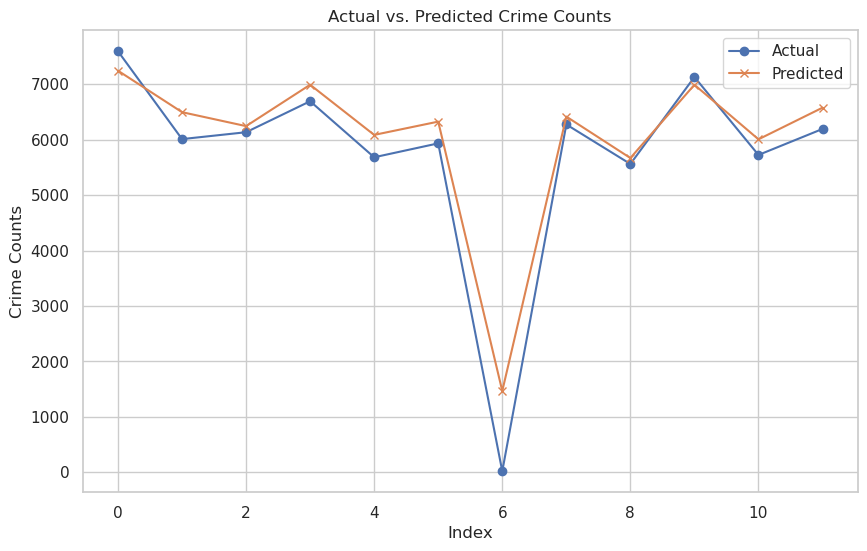

Feature Importances:
           Feature  Importance
1            month    0.592735
0             year    0.400395
2  lockdown_status    0.006869


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset in chunks
file_path = 'filtered_data.csv'
chunk_size = 100000

# Initialize an empty DataFrame for aggregated data
crime_data = pd.DataFrame()

# Process the file in chunks
for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size):
    # Extract month and year
    chunk['year_month'] = chunk['occured_on'].dt.to_period('M')
    # Group by month and count crimes
    monthly_data = chunk.groupby('year_month').size().reset_index(name='crime_count')
    crime_data = pd.concat([crime_data, monthly_data], ignore_index=True)

# Aggregate crime counts across chunks
crime_data = crime_data.groupby('year_month').sum().reset_index()
crime_data['year_month'] = crime_data['year_month'].astype(str)
crime_data['year_month'] = pd.to_datetime(crime_data['year_month'])

# Define lockdown status
crime_data['lockdown_status'] = np.where(
    (crime_data['year_month'] >= '2020-03') & (crime_data['year_month'] <= '2021-06'), 1, 0
)

# Create time-related features
crime_data['year'] = crime_data['year_month'].dt.year
crime_data['month'] = crime_data['year_month'].dt.month

# Prepare the data for modeling
X = crime_data[['year', 'month', 'lockdown_status']]
y = crime_data['crime_count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.legend()
plt.title('Actual vs. Predicted Crime Counts')
plt.xlabel('Index')
plt.ylabel('Crime Counts')
plt.show()

# Analyze feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)





What You Can Do With the Results:
Assess the Impact of COVID-19:

Compare predicted crime rates during and after the lockdown to quantify changes in crime patterns.
Visualize Trends:

Create time-series plots to show actual vs. predicted crime counts over time.
Analyze Key Drivers:

Use the feature importance chart to understand which factors (e.g., crime type, time period) drive crime trends.
Policy Recommendations:

Use the insights to inform law enforcement strategies, allocate resources, or design public safety measures.
